## k-means Samsung

In [1]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Datos de inicio:** valores de las acciones de Samsung.

conjunto de datos de las acciones de Samsung en bolsa para determinar cómo se agrupan usando k-means. 

Para ello nos descargamos de la web de **Yahoo Finanzas* el histórico con los valores desde el 1 de enero de 2010 de las acciones de Samsung Electronics Co., Ltd.
De los datos descargados, buscaremos patrones de agrupamiento entre dos señales elegidas, en este caso seleccionamos la señales
- **CLOSE** (precio de cierre diario) 
- **VOLUME** (volumen de contrataciones diario).
dataframe con los datos diarios desde el 1 de enero de 2010 hasta el 02 de Septiembre de 202

In [2]:
#https://drive.google.com/file/d/1j_7IcPXv5Q5JOkoCoTjC8pkknz_Fhcw4/view?usp=sharing

#df=pd.read_csv("https://drive.google.com/uc?id=1j_7IcPXv5Q5JOkoCoTjC8pkknz_Fhcw4")

df=pd.read_csv("https://drive.google.com/uc?id=1j_7IcPXv5Q5JOkoCoTjC8pkknz_Fhcw4")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,16060.0,16180.0,16000.0,16180.0,12810.788086,11950800
1,2010-01-05,16520.0,16580.0,16300.0,16440.0,13016.648438,27925850
2,2010-01-06,16580.0,16820.0,16520.0,16820.0,13317.517578,22948850
3,2010-01-07,16820.0,16820.0,16260.0,16260.0,12874.131836,22107950
4,2010-01-08,16400.0,16420.0,16120.0,16420.0,13000.813477,14777550
...,...,...,...,...,...,...,...
3120,2022-08-29,58700.0,58900.0,58600.0,58600.0,58600.000000,9841329
3121,2022-08-30,58700.0,59000.0,58300.0,58800.0,58800.000000,9690044
3122,2022-08-31,58200.0,59900.0,58200.0,59700.0,59700.000000,14203512
3123,2022-09-01,58700.0,58900.0,58300.0,58400.0,58400.000000,14905777


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df1=df[["Date", 'Close',  'Volume']]
df1

,Date,Close,Volume
0,2010-01-04,16180.0,11950800
1,2010-01-05,16440.0,27925850
2,2010-01-06,16820.0,22948850
3,2010-01-07,16260.0,22107950
4,2010-01-08,16420.0,14777550
...,...,...,...
3120,2022-08-29,58600.0,9841329
3121,2022-08-30,58800.0,9690044
3122,2022-08-31,59700.0,14203512
3123,2022-09-01,58400.0,14905777


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3125 non-null   object 
 1   Close   3125 non-null   float64
 2   Volume  3125 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 73.4+ KB


### Preprocesado de los datos.
En primer lugar, eliminamos los datos vacíos (NA) y resetamos el índice. El objetivo de dicho reseteo es que el índice que numera las filas no se reajusta cuando eliminamos filas vacías, y pueden presentarse problemas de dimensionalidad al extraer columnas para posteriormente agregarlas:

In [8]:
df1.isna().sum()

Date      0
Close     0
Volume    0
dtype: int64

In [9]:
 #%% Se eliminan filas que tengan valor NaN.
 df1 = df1.dropna()
 df1 = df1.reset_index(drop=True)

In [10]:
df1

,Date,Close,Volume
0,2010-01-04,16180.0,11950800
1,2010-01-05,16440.0,27925850
2,2010-01-06,16820.0,22948850
3,2010-01-07,16260.0,22107950
4,2010-01-08,16420.0,14777550
...,...,...,...
3120,2022-08-29,58600.0,9841329
3121,2022-08-30,58800.0,9690044
3122,2022-08-31,59700.0,14203512
3123,2022-09-01,58400.0,14905777


In [11]:
#%% Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df1['Date'] # Guardamos la columna Date.
df1 = df1.drop('Date', axis=1) # Borramos la columna del dataframe.
df1

,Close,Volume
0,16180.0,11950800
1,16440.0,27925850
2,16820.0,22948850
3,16260.0,22107950
4,16420.0,14777550
...,...,...
3120,58600.0,9841329
3121,58800.0,9690044
3122,59700.0,14203512
3123,58400.0,14905777


## Normalización de los datos.
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo. En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].

In [12]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df1)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [13]:
df_escalado

,Close,Volume
0,0.033333,0.132336
1,0.036693,0.309235
2,0.041602,0.254123
3,0.034367,0.244811
4,0.036434,0.163638
...,...,...
3120,0.581395,0.108977
3121,0.583979,0.107302
3122,0.595607,0.157282
3123,0.578811,0.165058


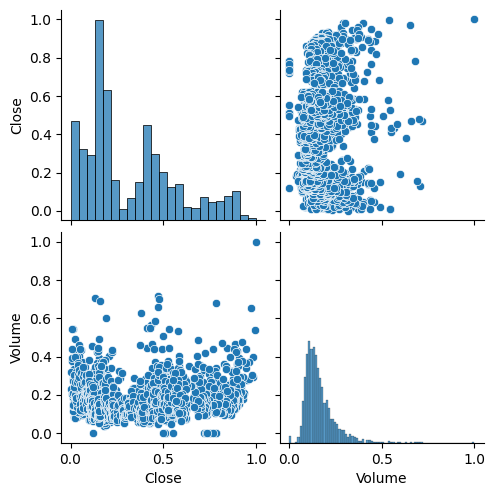

In [15]:
import seaborn as sns
sns.pairplot(data=df_escalado)    

## Representación gráfica de los datos.
Ahora podemos echar un vistazo a la representación gráfica de nuestros datos. En el eje x representaremos el precio de cierre (CLOSE) y en el eje y el volumen (VOLUME):

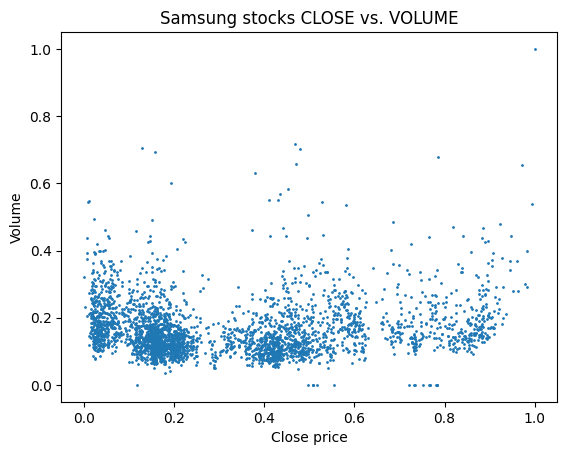

In [16]:
#%% Representación gráfica de los datos.
x = df_escalado['Close'].values
y = df_escalado['Volume'].values
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks CLOSE vs. VOLUME')
plt.plot(x,y,'o',markersize=1)

A priori, la nube de puntos parece indicar que, a mayor volumen menor es el precio de cierre estabilizándose conforme el precio del CLOSE aumenta.

Hay que indicar que hemos representado gráficamente los datos normalizados, pero que, si hubiésemos representado los datos sin normalizar la gráfica sería exactamente igual, con la única diferencia que la escala de los ejes sería diferente.

# Aplicación de k-means.
El primer paso antes de aplicar k-means es decidir qué valor de k (número de clústeres) queremos usar. Una forma de elegir este valor k es por criterio propio: si conocemos bien la distribución de nuestros datos y queremos “forzar” un número determinado de clústeres simplemente lo elegimos.

La otra opción es realizar una gráfica elbow o de codo para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y la suma de los errores cuadráticos (SSE). De esta forma podemos elegir el valor de k dónde se produce el “codo” de la curva:

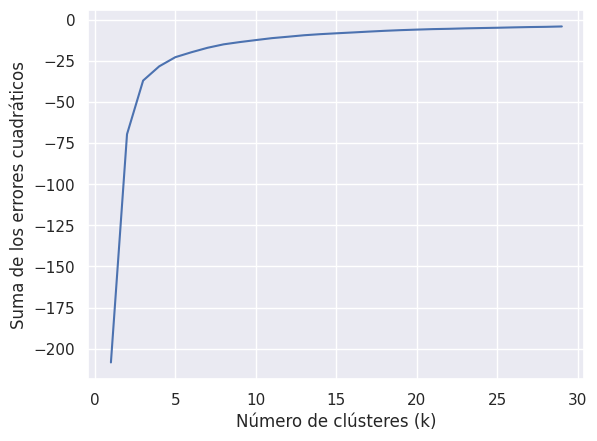

In [17]:
#%% Curva elbow para determinar valor óptimo de k.
sns.set_theme()
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

La curva elbow nos muestra que un valor de k = 5 puede ser apropiado, aunque se podría probar con valores entre 5 y 10 y comparar resultados. No hay una solución, un valor de k, más correcto que otro, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución escogida.

In [18]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.42516368 0.1230706 ]
 [0.17604872 0.12798474]
 [0.81531273 0.19385542]
 [0.06500976 0.22173366]
 [0.55705435 0.23280665]]


## Etiquetado de datos.
Ya hemos ejecutado k-means y obtenido los centroides. Ahora podemos asignar cada registro de nuestro dataset a uno de los clústers:

In [19]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)
df1['label'] = labels
df1

,Close,Volume,label
0,16180.0,11950800,3
1,16440.0,27925850,3
2,16820.0,22948850,3
3,16260.0,22107950,3
4,16420.0,14777550,3
...,...,...,...
3120,58600.0,9841329,4
3121,58800.0,9690044,4
3122,59700.0,14203512,4
3123,58400.0,14905777,4


In [20]:
df1.groupby("label").count()

,Close,Volume
label,,
0,712,712
1,1102,1102
2,365,365
3,638,638
4,308,308


In [21]:
df1.label.value_counts()

1    1102
0     712
3     638
2     365
4     308
Name: label, dtype: int64

Se ha añadido la columna “label” a nuestro dataframe original sin normalizar, por lo que ahora, cada registro está asignado a un único clúster. Le añadimos también la columna “Date” que extrajimos al inicio para saber a qué fecha corresponde cada registro:

In [22]:
#%% Añadimos la columna de fecha
df1.insert(0, 'Date', dates)

In [23]:
df1

,Date,Close,Volume,label
0,2010-01-04,16180.0,11950800,3
1,2010-01-05,16440.0,27925850,3
2,2010-01-06,16820.0,22948850,3
3,2010-01-07,16260.0,22107950,3
4,2010-01-08,16420.0,14777550,3
...,...,...,...,...
3120,2022-08-29,58600.0,9841329,4
3121,2022-08-30,58800.0,9690044,4
3122,2022-08-31,59700.0,14203512,4
3123,2022-09-01,58400.0,14905777,4


## Representación gráfica de los clústeres k-means.
Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que hemos usado sólo dos variables.

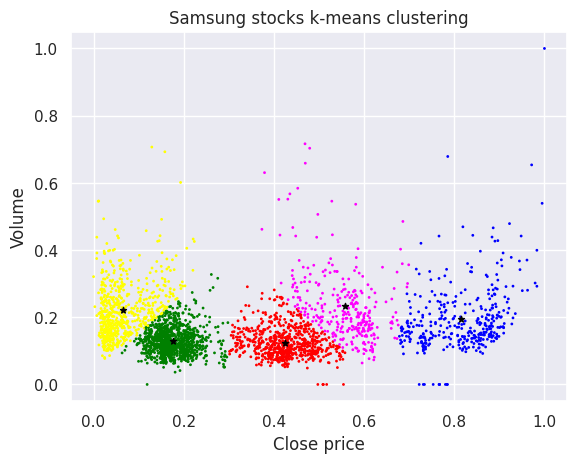

In [24]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks k-means clustering')
plt.show()

La interpretación de los grupos creados por k-means es una tarea que debe realizar el especialista de los datos. En este caso, y de forma simplificada, podríamos describir cada grupo de la siguiente forma:

- Clúster amarillo: grupo de alto volumen y precio de cierre bajo. 


- Clúster rojo: grupo de bajo volumen y precio de cierre medio
- Clúster fucsia: grupo de alto volumen y precio de cierre medio
- Clúster verde: bajo volumen y bajo precio de cierre

-cluster azul: volumen alto, precio de cierre alto

## Clasificación de nuevas muestras.

Por último, queda por determinar la forma de clasificar nuevas muestras. Es decir, que dados nuevos datos de entrada, determinar a qué clúster pertenecen.

Supongamos que nuestros nuevos datos a categorizar son los siguientes:

CLOSE: 46.850
VOLUME: 7.196.370
Introducimos estos nuevos datos como un dataframe de una única fila:

In [25]:
close = 46850
volume = 7196370

nuevo_dato = pd.DataFrame([[close,volume]]) # Nueva muestra
nuevo_dato = nuevo_dato.rename(columns = {0: 'Close', 1: 'Volume'})

In [26]:
nuevo_dato

,Close,Volume
0,46850,7196370


No podemos introducir como tal estos valores en el algoritmo k-means ya que no están normalizados. Así que en primer lugar hay que normalizar, y para ello debemos agregarlos al conjunto de datos original.

Añadimos por tanto esta nueva fila de datos a nuestro dataframe de inicio y lo guardamos con el nombre df_n para no sobrescribir el original:

In [27]:
df_n = df1.append(nuevo_dato)

In [28]:
df_n

,Date,Close,Volume,label
0,2010-01-04,16180.0,11950800,3.0
1,2010-01-05,16440.0,27925850,3.0
2,2010-01-06,16820.0,22948850,3.0
3,2010-01-07,16260.0,22107950,3.0
4,2010-01-08,16420.0,14777550,3.0
...,...,...,...,...
3121,2022-08-30,58800.0,9690044,4.0
3122,2022-08-31,59700.0,14203512,4.0
3123,2022-09-01,58400.0,14905777,4.0
3124,2022-09-02,57500.0,15040310,4.0


Nuestro nuevo dataframe df_n tiene aun las columnas “date” y “label” del datafame original, así que las eliminamos y resetamos el índice:

In [29]:
df_n = df_n.drop('Date', axis=1)
df_n = df_n.drop('label', axis=1)
df_n = df_n.reset_index(drop=True)

In [30]:
df_n

,Close,Volume
0,16180.0,11950800
1,16440.0,27925850
2,16820.0,22948850
3,16260.0,22107950
4,16420.0,14777550
...,...,...
3121,58800.0,9690044
3122,59700.0,14203512
3123,58400.0,14905777
3124,57500.0,15040310


In [31]:
#Ahora procedemos a normalizar el Dataframe completo como hizo anteriormente:

min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_n)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [32]:
df_escalado

,Close,Volume
0,0.033333,0.132336
1,0.036693,0.309235
2,0.041602,0.254123
3,0.034367,0.244811
4,0.036434,0.163638
...,...,...
3121,0.583979,0.107302
3122,0.595607,0.157282
3123,0.578811,0.165058
3124,0.567183,0.166548


Por tanto, los valores normalizados son:

CLOSE: 0,429587
VOLUME: 0,079689
Podemos introducir estos nuevos datos ya normalizados a mano o extraerlos en forma de vector numpy:

In [33]:
close_n = df_escalado['Close'][2961]
volume_n = df_escalado['Volume'][2961]
import numpy as np
X_new = np.array([[close_n, volume_n]]) # Nueva muestra

In [34]:
X_new

array([[0.84108527, 0.13761424]])

In [35]:
#Por último, introducimos el array X_new en k-means:

new_labels = kmeans.predict(X_new)
print(new_labels)

[2]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [36]:
kmeans.cluster_centers_

array([[0.42516368, 0.1230706 ],
       [0.17604872, 0.12798474],
       [0.81531273, 0.19385542],
       [0.06500976, 0.22173366],
       [0.55705435, 0.23280665]])

## Representación gráfica de la nueva muestra.
Podemos representar gráficamente el nuevo punto y verificar que, efectivamente, corresponde con el clúster AZUL:

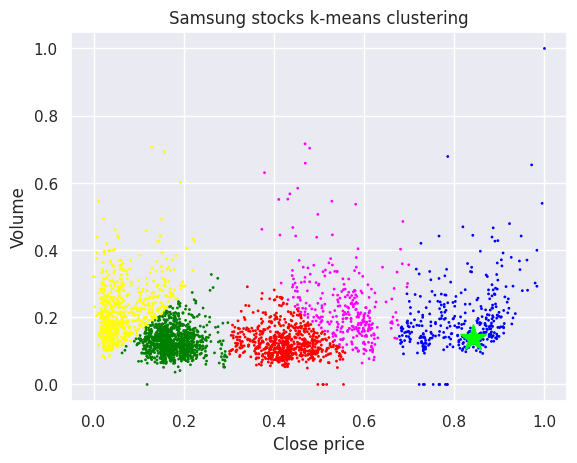

In [37]:
#%% Plot del nuevo dato clusterizado.

colores=['red','green','blue','yellow','fuchsia']

asignar=[]
for row in labels:
     asignar.append(colores[row])

fig, ax = plt.subplots()
x_n = close_n
y_n = volume_n
 
plt.plot(x_n,y_n, '*', color = 'lime', markersize = 20)
plt.scatter(x, y, c=asignar, s=1)
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks k-means clustering')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b01f3fd-002a-43ad-8b2f-83f22b9a4ee6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>